In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

In [3]:
!ls /g/data/ua8/C20C/v3/

about_land_masks.nc  member_daily
land.nc		     member_monthly
LAND.nc		     README_20C_Reanalysis_version_3_everymember.txt
land.sflx.nc	     spread_daily
mean_3hr	     subdaily
mean_daily	     tmp
mean_monthly	     untar.sh


In [4]:
# Create a list with all the strings identifying your members
# use a combination of range and zfill to get the leading zeros.
member_list = [str(x).zfill(2) for x in range(1,81)]

In [5]:
# load pr data
member_ds_p = {}
for i in member_list:
    path = f'/g/data/ua8/C20C/v3/member_monthly/PRATE/*/*_mem0{i}.nc'
    member_ds_p[i] = xr.open_mfdataset(path)
    member_ds_p[i] = member_ds_p[i].chunk(chunks={'time':-1})

In [6]:
# concatenate the data into an xarray with the new member dimension
ds_prate = xr.concat(member_ds_p.values(), dim='member')
ds_prate.coords['member'] = member_list

In [7]:
ds_prate

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 256, lon: 512, member: 80, time: 1992)
Coordinates:
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat        (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * time       (time) datetime64[ns] 1850-01-16T10:30:00 ... 2015-12-16T10:30:00
  * member     (member) <U2 '01' '02' '03' '04' '05' ... '77' '78' '79' '80'
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (member, time, bnds) datetime64[ns] dask.array<chunksize=(1, 1992, 2), meta=np.ndarray>
    PRATE      (member, time, lat, lon) float32 dask.array<chunksize=(1, 1992, 256, 512), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Sun Dec 23 05:57:59 2018: cdo -v -f nc4 -r -monavg PRATE....
    institution:    NOAA ESRL Physical Sciences Division & CU/CIRES \n
    Conventions:    CF-1.6
    platform:       Model
    citation:       <http://onlinelibrary.wiley.com/doi/10.1002/qj.776/abstra...
    experiment:     451 = SODAsi.3 pentad 8 member SSTs climatologically adju...
    observations:   International Surface Pressure Databank version 4.7
    frequency:      mon
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...
    comments:       Data is from \n NOAA-CIRES-DOE 20th Century Reanalysis ve...
    main_citation:  <https://doi.org/10.1002/qj.3598>.\n Slivinski et al. 201...
    home_page:      <https://go.usa.gov/XTd>

In [10]:
data2 = ds_prate.mean(dim=['lat','lon','member']).sel(time=slice('1880-01','1890-01'))

<xarray.Dataset>
Dimensions:  (time: 121)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-16T10:30:00 ... 1890-01-16T10:30:00
Data variables:
    PRATE    (time) float32 dask.array<chunksize=(121,), meta=np.ndarray>

In [8]:
prate_alltime = ds_prate.mean(dim=['lat','lon','member'])

### So I can plot the precipitation time series for the entire time period of 1850-2015 (without the kernel dying). But it still takes a while to plot (at least 5 minutes, myabe up to 20min)

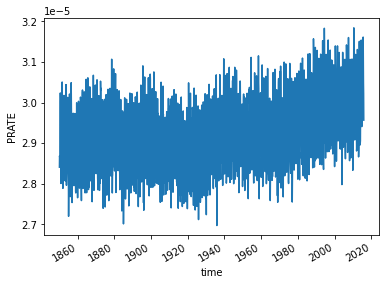

In [9]:
# try plotting rainfall 
fig, axes = plt.subplots(1, 1)
prate_alltime.PRATE.plot(ax=axes)

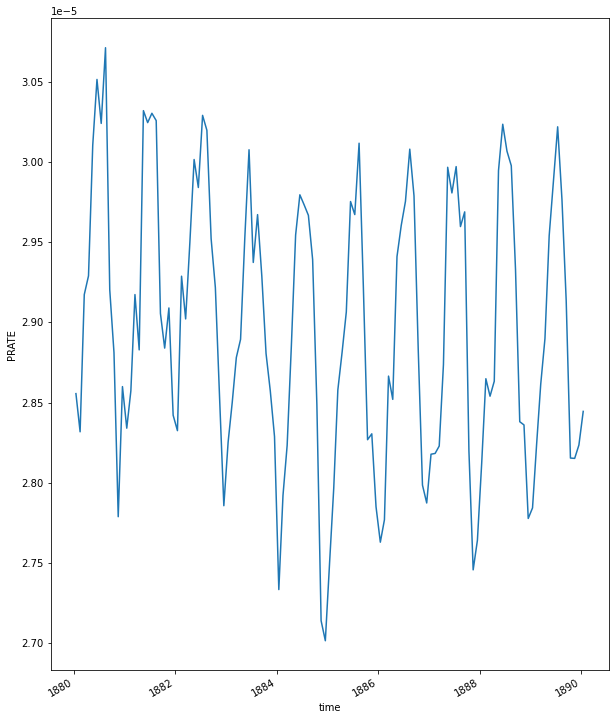

In [12]:
# plot pr for 1880-1890 to see if there's a problem with the data or if it's all g
fig, axes = plt.subplots(1, 1)
data2.PRATE.plot(ax=axes)

In [10]:
# load temp data
member_ds_t = {}
for i in member_list:
    path = f'/g/data/ua8/C20C/v3/member_monthly/TMPS/*/*_mem0{i}.nc'
    member_ds_t[i] = xr.open_mfdataset(path)
    member_ds_t[i] = member_ds_t[i].chunk(chunks={'time':-1})

In [14]:
# concatenate the data into an xarray with the new member dimension
# the dask line reduces the size of the chunks and hopefully allows tmp to be plotted without the kernel dying
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ds_tmps = xr.concat(member_ds_t.values(), dim='member')
ds_tmps.coords['member'] = member_list


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/core.py:4143: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/g/data3/hh5/public/

In [15]:
tmp = ds_tmps.mean(dim=['lat','lon','member']).sel(time=slice('1880-01','1890-01'))
tmp

<xarray.Dataset>
Dimensions:  (time: 121)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-16T10:30:00 ... 1890-01-16T10:30:00
Data variables:
    TMP      (time) float32 dask.array<chunksize=(121,), meta=np.ndarray>

# Kernel dies here when I try to plot the tmp data (though the pr data works)

In [ ]:
# seeing if I can get the temperature to plot without the kernel dying
fig, axes = plt.subplots(1, 1)
with dask.diagnostics.ProgressBar(): 
    tmp.TMP.plot(ax=axes)

[#                                       ] | 3% Completed |  2min 49.9s

In [8]:
# combine precipitation and temperature into one dataset
reanal = xr.Dataset({'pr': ds_prate.PRATE})
# change the pr units
reanal['pr'] = reanal.pr*86400
reanal

,Array,Chunk
Bytes,167.10 GB,2.09 GB
Shape,"(80, 1992, 256, 512)","(1, 1992, 256, 512)"
Count,40160 Tasks,80 Chunks
Type,float64,numpy.ndarray


In [9]:
# # combine precipitation and temperature into one dataset
# reanal = xr.Dataset({'tmp': ds_tmps.TMP, 'pr': ds_prate.PRATE})
# # change the pr units
# reanal['pr'] = reanal.pr*86400
# reanal

## Area weighting and land frac

In [10]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/ua8/C20C/v3/land.nc')
landmask = landfrac_ds.mean(dim='time')

In [11]:
# area weighting 
reanal_w = reanal*np.cos(reanal.lat*(np.pi/180))

In [12]:
data1 = reanal_w.sel(time=slice('1850-01','1900-01')).mean(dim=['lat','lon','member'])

When I had tmp and pr combined in a dataset and then tried to just plot pr, it didn't work, the kernel died.  I'll try the same thing, but without tmp in the datset and see if it works!!

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,12)) # make a figure
with dask.diagnostics.ProgressBar():
    data1.pr.plot(ax=axes)

[#                                       ] | 4% Completed |  1min 10.7s

[########################################] | 100% Completed | 20min 56.7s


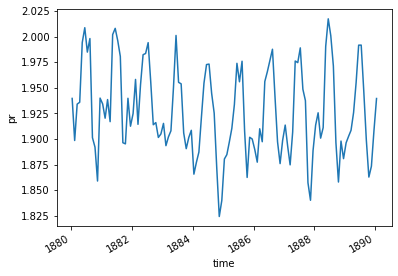

In [17]:
# same as above but this time without tmp having ever been in the same dataset
fig, axes = plt.subplots(1, 1) # make a figure
with dask.diagnostics.ProgressBar():
    data1.pr.sel(time=slice('1880-01','1890-01')).plot(ax=axes)

Could check here if the following graph works for the entire time period

## Group the data by month

In [19]:
# group the data by month (take the monthly mean)
reanal_mon = reanal_w.resample(time='M').mean(dim='time')

In [20]:
# use functions to calculate the monthly anomalies for the globe
monthly_anom_glob = func.monthly_anomaly(reanal_mon, '1850-01', '1881-01')

In [21]:
data = monthly_anom_glob.sel(time=slice('1850-01','1900-01')).mean(dim=['lat','lon','member'])

Again, when I had tmp and pr combined in a dataset and then tried to just plot pr, it didn't work, the kernel died. But again, I'll try the same thing, but without tmp in the datset and see if it works. 

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,12)) # make a figure
with dask.diagnostics.ProgressBar():
    data.pr.sel(time=slice('1850-01','1900-01')).plot(ax=axes)

[                                        ] | 0% Completed |  1min 41.7s

[########################################] | 100% Completed | 25min 19.4s


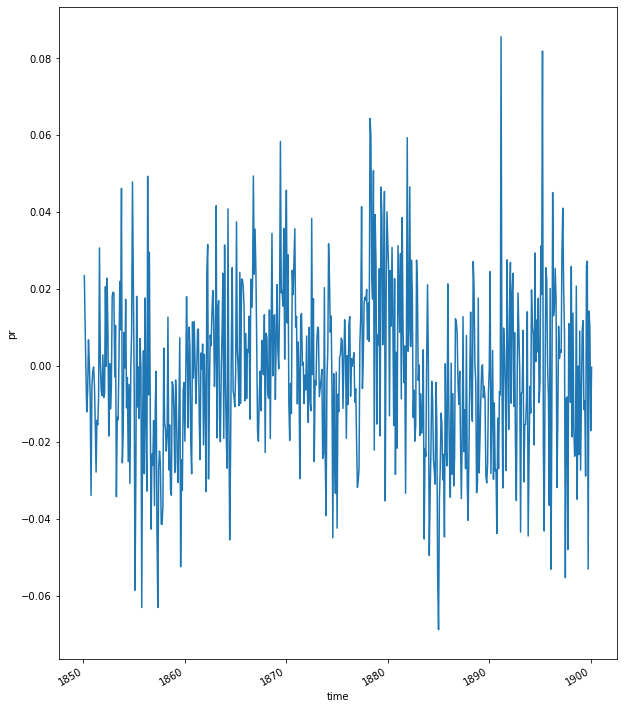

In [22]:
# with just pr in dataset
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,12)) # make a figure
with dask.diagnostics.ProgressBar():
    data.pr.plot(ax=axes)

In [23]:
# Select out SH and NH anomalies 
monthly_anom_SH = monthly_anom_glob.sel(lat=slice(-90,0)) 
monthly_anom_NH = monthly_anom_glob.sel(lat=slice(0,90)) 

In [35]:
# select out the Australian and E Australian anomalies 
monthly_anom_Aus = monthly_anom_glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.land==1, drop=True)
monthly_anom_EA = monthly_anom_glob.sel(lat=slice(-50,-10), lon=slice(140,155)).where(landmask.land==1, drop=True)

## Multi-member mean


In [37]:
# take the lat lon mean for mmm datsets for each region
llm_Glob = monthly_anom_glob.mean(dim=['lat','lon'])
llm_SH = monthly_anom_SH.mean(dim=['lat','lon'])
llm_NH = monthly_anom_NH.mean(dim=['lat','lon'])
llm_Aus = monthly_anom_Aus.mean(dim=['lat','lon'])
llm_EA = monthly_anom_EA.mean(dim=['lat','lon'])

In [38]:
# Take the multi-member mean for each region
mmm_mon_Glob = monthly_anom_glob.mean(dim='member').mean(dim=['lat','lon'])
mmm_mon_SH = monthly_anom_SH.mean(dim='member').mean(dim=['lat','lon'])
mmm_mon_NH = monthly_anom_NH.mean(dim='member').mean(dim=['lat','lon'])
mmm_mon_Aus = monthly_anom_Aus.mean(dim='member').mean(dim=['lat','lon'])
mmm_mon_EA = monthly_anom_EA.mean(dim='member').mean(dim=['lat','lon'])

## Percentiles

In [39]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p10_mon_Glob = llm_Glob.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_SH = llm_SH.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_NH = llm_NH.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_Aus = llm_Aus.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_EA = llm_EA.chunk({'member': -1}).quantile(0.1, dim=['member'])

In [40]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p90_mon_Glob = llm_Glob.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_SH = llm_SH.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_NH = llm_NH.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_Aus = llm_Aus.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_EA = llm_EA.chunk({'member': -1}).quantile(0.9, dim=['member'])

## Figures

In [ ]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

# KERNEL KEEPS DYING HERE WHEN I TRY TO PLOT STUFF!!!! 

In [ ]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,12)) # make a figure
with dask.diagnostics.ProgressBar():
    mmm_mon_Glob.tmp.plot(ax=axes)


Kernel died for tmp above, but now i'm trying for pr without tmp in the original dataset

In [ ]:
# Monthly pr anomalies stacked
fig, axes = plt.subplots(1, 1) # make a figure
with dask.diagnostics.ProgressBar():
    mmm_mon_Glob.pr.plot(ax=axes)

[                                        ] | 0% Completed | 33.0s

In [1]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
#     fplot.timeseries_graph(mmm_mon_Glob.tmp, p10_mon_Glob.tmp, p90_mon_Glob.tmp, ax = axes[0], color='lightcoral')
#     fplot.timeseries_graph(mmm_mon_SH.tmp, p10_mon_SH.tmp, p90_mon_SH.tmp, ax = axes[1], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_Aus.tmp, p10_mon_Aus.tmp, p90_mon_Aus.tmp, ax = axes[2], color='lightcoral')
#     fplot.timeseries_graph(mmm_mon_EA.tmp, p10_mon_EA.tmp, p90_mon_EA.tmp, ax = axes[3], color='lightcoral')

axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

#fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('R_timeseries_mon_tmp_stacked.png', dpi=300, bbox_inches='tight')

NameError: name 'plt' is not defined

In [ ]:
# same plot but stacked rather than 2x2
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
#     fplot.timeseries_graph(mmm_mon_Glob.pr, p10_mon_Glob.pr, p90_mon_Glob.pr, ax = axes[0], color='mediumaquamarine')
#     fplot.timeseries_graph(mmm_mon_SH.pr, p10_mon_SH.pr, p90_mon_SH.pr, ax = axes[1], color='mediumaquamarine')
    fplot.timeseries_graph(mmm_mon_Aus.pr, p10_mon_Aus.pr, p90_mon_Aus.pr, ax = axes[2], color='mediumaquamarine')
#     fplot.timeseries_graph(mmm_mon_EA.pr, p10_mon_EA.pr, p90_mon_EA.pr, ax = axes[3], color='mediumaquamarine')

# set axis labels and subplot titles
axes[0].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[1].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Southern Hemisphere')
axes[2].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Australia')
axes[3].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Eastern Australia')

#fig.suptitle('Time series of precipitation anomalies', size=16)

#fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('R_timeseries_mon_pr_stacked.png', dpi=300, bbox_inches='tight')

In [ ]:
# same plot but stacked rather than 2x2
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
    fplot.timeseries_graph(mmm_mon_Glob.pr, p10_mon_Glob.pr, p90_mon_Glob.pr, ax = axes[0], color='mediumaquamarine')
    fplot.timeseries_graph(mmm_mon_SH.pr, p10_mon_SH.pr, p90_mon_SH.pr, ax = axes[1], color='mediumaquamarine')
    fplot.timeseries_graph(mmm_mon_Aus.pr, p10_mon_Aus.pr, p90_mon_Aus.pr, ax = axes[2], color='mediumaquamarine')
    fplot.timeseries_graph(mmm_mon_EA.pr, p10_mon_EA.pr, p90_mon_EA.pr, ax = axes[3], color='mediumaquamarine')

# set axis labels and subplot titles
axes[0].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[1].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Southern Hemisphere')
axes[2].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Australia')
axes[3].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Eastern Australia')

#fig.suptitle('Time series of precipitation anomalies', size=16)

#fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('R_timeseries_mon_pr_stacked.png', dpi=300, bbox_inches='tight')

In [ ]:
# define a function for subplots in the timeseries
def timeseries_graph(mmm_dataset, ax = None, **kwargs):
    """Create subplots of a time series.  
    Add lines to show dates of five major eruptions between 1850-2014.  
    Return the axis.  
    
    Args:
        mmm_dataset (array): array of values (multi-model mean of climate variable) to be plotted in time series 
        ax (axis): axis
        **kwargs
    """
    import matplotlib.pyplot as plt, numpy as np
    
    # checking if an axis has been defined and if not creates one with function "get current axes"
    if ax is None:
        ax = plt.gca()
        
    # SUBPLOT
    # plot the multi_model mean
    mmm_dataset.plot(ax=ax, **kwargs)

    ax.grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
    ax.minorticks_on() # need this line in order to get the minor grid lines 
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='k')
    
    # specify an array of eruption dates so I can mark the dates where erutpions occur on the plot
    e_dates = [np.array('1883-08-31T00:00:00.000000000', dtype='datetime64[ns]'),
     np.array('1902-10-31T00:00:00.000000000', dtype='datetime64[ns]'),
     np.array('1963-03-31T00:00:00.000000000', dtype='datetime64[ns]'),
     np.array('1982-04-30T00:00:00.000000000', dtype='datetime64[ns]'),
     np.array('1991-06-30T00:00:00.000000000', dtype='datetime64[ns]')]
    
    # Plot a dashed line to show the eruption time for the 5 major eruptions
    for date in e_dates:
        if date in mmm_dataset.time.data:
            ax.axvline(x=date, color = 'r', linestyle = '--', alpha = 0.9, linewidth='1.5')
    
    #label axes
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    return(ax) 

In [ ]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
    fplot.timeseries_graph(llm_Glob.tmax, ax = axes[0], color='crimson')
    fplot.timeseries_graph(llm_SH.tmax, ax = axes[1], color='crimson')
    fplot.timeseries_graph(llm_Aus.tmax,  ax = axes[2], color='crimson')
    fplot.timeseries_graph(llm_EA.tmax, ax = axes[3], color='crimson')

#axes[0].axvline(x=e_dates[0], color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')

axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

# R stands for reanalysis
plt.savefig('R_timeseries_mon_tmax_stacked.png', dpi=300, bbox_inches='tight')